In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# The Merged dataset was imported into the Jupiter Notebook


FILENAME = 'MergedDataset.csv'

data = pd.read_csv(FILENAME)
data = data.drop(columns = ['InChI_Key', 
                        'species', 'SLN','MolWt','ExactMolWt',
                        'SMILES','UnLogged_LogS','UnLoggedKh_first'], axis=1)


data = data.rename(columns={'Kh_first': 'LogKh'})
data = data.rename(columns={'SMILES': 'Smiles'})

data




,LogS,MW,MLOGP,LogKh,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-4.100,241.41,2.893,-6.709304,4.303889,0.309265,4.303889,0.309265,0.770836,222.212,...,1,0,0,0,0,0,0,0,0,0
1,-4.230,100.23,3.869,12.129112,2.298611,0.583333,2.298611,0.583333,0.500244,84.077,...,0,0,0,0,0,0,0,0,0,0
2,-3.740,86.20,3.516,12.040558,2.253472,0.898148,2.253472,0.898148,0.483890,72.066,...,0,0,0,0,0,0,0,0,0,0
3,-1.280,107.17,1.859,0.139262,3.026944,1.159722,3.026944,1.159722,0.575903,98.084,...,0,0,0,0,0,0,0,0,0,0
4,-5.510,140.30,4.678,12.507178,3.694652,1.200521,3.694652,1.200521,0.371151,120.110,...,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,-3.010,144.29,3.503,2.207275,8.468955,0.368827,8.468955,0.368827,0.544619,124.098,...,0,0,0,0,0,0,0,0,5,0
878,-6.168,389.30,4.214,0.733969,6.650023,-1.503302,6.650023,0.060756,0.440550,384.280,...,0,0,0,0,0,0,0,0,0,0
879,-3.180,96.19,2.420,8.254829,2.298611,1.319444,2.298611,1.319444,0.406338,84.077,...,0,0,0,0,0,0,0,0,0,0
880,-1.460,198.15,1.748,-3.761200,10.371759,-0.865741,10.371759,0.102685,0.572065,192.086,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Select features (descriptors) relevant for the model
Features=data[['MW','MLOGP','HeavyAtomMolWt','NumValenceElectrons','BertzCT','Chi0','Chi0v','Chi1','Chi1v','LabuteASA','PEOE_VSA6','HeavyAtomCount','MolLogP','MolMR']]
# Using LogS as a target
Target = data.iloc[:, :1]

X_train, X_test, y_train, y_test = train_test_split(Features,Target,
                                                    test_size=0.2,  random_state=42)

#Scale the input data to between 1 and 0 so you can plot/model them all on one graph   

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)  
    
y_train = np.array(y_train)
y_test = np.array(y_test)   

print(X_train) 
print(Target)
print(Features)

[[0.56843567 0.37278107 0.53460899 ... 0.71428571 0.44066123 0.63014425]
 [0.18766189 0.45732473 0.1715747  ... 0.17857143 0.42931158 0.2035261 ]
 [0.23441159 0.40909091 0.22622989 ... 0.32142857 0.41650208 0.30333117]
 ...
 [0.26311209 0.36614667 0.25262046 ... 0.21428571 0.36253041 0.22116526]
 [0.59813084 0.49390353 0.56823268 ... 0.53571429 0.60321311 0.58755902]
 [0.43610253 0.80096826 0.37021397 ... 0.53571429 0.7208387  0.6       ]]
      LogS
0   -4.100
1   -4.230
2   -3.740
3   -1.280
4   -5.510
..     ...
877 -3.010
878 -6.168
879 -3.180
880 -1.460
881 -1.810

[882 rows x 1 columns]
         MW  MLOGP  HeavyAtomMolWt  NumValenceElectrons     BertzCT  \
0    241.41  2.893         222.212                   90  311.731316   
1    100.23  3.869          84.077                   44   38.000000   
2     86.20  3.516          72.066                   38   21.219281   
3    107.17  1.859          98.084                   42  145.732814   
4    140.30  4.678         120.110           

In [4]:
# Run the model
from sklearn.linear_model import LinearRegression 
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

print(Target)
print (Features)


      LogS
0   -4.100
1   -4.230
2   -3.740
3   -1.280
4   -5.510
..     ...
877 -3.010
878 -6.168
879 -3.180
880 -1.460
881 -1.810

[882 rows x 1 columns]
         MW  MLOGP  HeavyAtomMolWt  NumValenceElectrons     BertzCT  \
0    241.41  2.893         222.212                   90  311.731316   
1    100.23  3.869          84.077                   44   38.000000   
2     86.20  3.516          72.066                   38   21.219281   
3    107.17  1.859          98.084                   42  145.732814   
4    140.30  4.678         120.110                   60   64.438562   
..      ...    ...             ...                  ...         ...   
877  144.29  3.503         124.098                   62   44.689956   
878  389.30  4.214         384.280                  100  476.454663   
879   96.19  2.420          84.077                   40   54.438562   
880  198.15  1.748         192.086                   74  414.786336   
881  146.15  2.265         140.097                   54  428.51

Percentage of Correct Predictions within Margin of 0.1: 15.25%
Model MAE 0.58


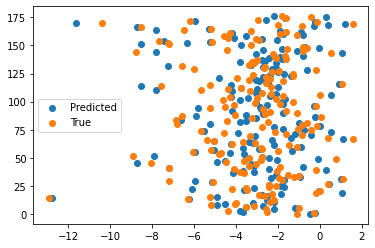


Difference Behavior


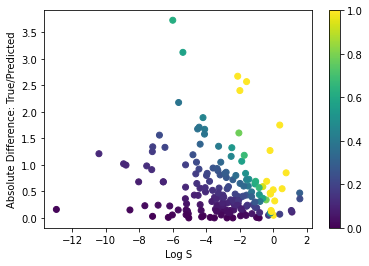

Truth/Prediction Absolute Difference Statistics
Mean: 0.58
Standard Deviation: 0.6
Variance: 0.36


In [5]:
from sklearn.metrics import mean_absolute_error

#Calculate the error on the model and how many data points lie within a selected margin 

Margin = .1

Comparison = pd.DataFrame()

y_pred = model.predict(X_test).reshape(-1)

Comparison['Predicted'] = y_pred
Comparison['True'] = y_test

Comparsion = Comparison.reset_index()

plt.scatter(Comparison['Predicted'],Comparison.index)
plt.scatter(Comparison['True'],Comparison.index)
 
count = 0
total = 0
difference = []
for index,row in Comparison.iterrows():
    pred = row['Predicted']
    true = row['True']
    if true-Margin <= pred <= true+Margin:
        difference.append(abs(pred-true))
        count +=1
        total +=1
    else:
        difference.append(abs(pred-true))
        total +=1
        
print(f'Percentage of Correct Predictions within Margin of {Margin}: {round((count/total)*100,2)}%')
print(f'Model MAE {round(mean_absolute_error(y_test, y_pred),2)}')
plt.legend(['Predicted','True'])
plt.show() 

print()
print('Difference Behavior')

Comparison['Abs_Difference'] = difference

percentage = []
for i in range(len(y_test)):
    if abs(difference[i]) < abs(y_test[i]):
        ratio = abs(difference[i]) / abs(y_test[i])
        percentage.append(ratio[0])
    else:
        percentage.append(1.0)
    
Comparison['Percentage'] = percentage

plt.scatter(Comparison['True'],Comparison['Abs_Difference'], c=Comparison['Percentage'])
plt.xlabel('Log S')
plt.ylabel('Absolute Difference: True/Predicted')
plt.colorbar()
plt.show()



abs_mean = round(np.mean(difference),2)
abs_std = round(np.std(difference),2)
abs_var = round(np.var(difference),2)

print("Truth/Prediction Absolute Difference Statistics")
print(f"Mean: {abs_mean}")
print(f"Standard Deviation: {abs_std}")
print(f"Variance: {abs_var}")

# Colour bar shows the severity of the error, 

# = absolute difference between true and pred over the true
# value itself


In [6]:
#R^2 regresssion score for the Training model
model.score(X_train, y_train)

0.9989940462570166

In [7]:
#R^2 regresssion score for the Testing model
model.score(X_test, y_test)

0.8683773374688694

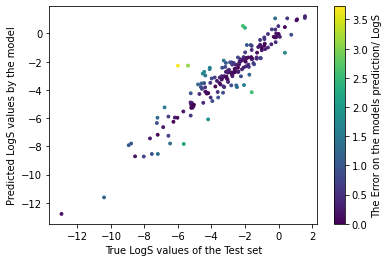

In [8]:
#Plot a scatter graph to show the effectiveness of the model 

plt.scatter(y=y_pred,x=y_test,c=Comparison['Abs_Difference'],  s =8)
plt.xlabel("True LogS values of the Test set")
plt.ylabel("Predicted LogS values by the model")

cbar=plt.colorbar()
cbar.set_label('The Error on the models prediction/ LogS')